In [157]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, Ridge

In [158]:
#функция для построения визуализаций моделей регресии
def plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat):

    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Train set', fontsize=20)
    
    x_line = np.linspace(train_min - margin, train_max + margin)
    y_line = x_line
    plt.plot(x_line, y_line, color='blue', linestyle='--')

    plt.subplot(122)
    plt.scatter(y_test, y_test_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Test set', fontsize=20)
    x_line = np.linspace(train_min - margin, train_max + margin)
    y_line = x_line
    plt.plot(x_line, y_line, color='blue', linestyle='--')
    
    pass

## Импорт данных

In [159]:
df = pd.read_csv('Признаки.csv')
df.head()

Срок размещения объявления (дней)       Модель машины  Год выпуска  \
0                                  0       BMW X7 4.4 AT         2024   
1                                  0  BMW 7 серия 3.0 AT         2023   
2                                  0       BMW X7 3.0 AT         2024   
3                                  0       BMW XM 4.4 AT         2023   
4                                  5       BMW X7 3.0 AT         2020   

   Пробег, км  Цена машины, ₽   Тип машины  Привод Тип топлива  \
0           1        21900000  внедорожник  полный      бензин   
1          50        17000000        седан  полный      дизель   
2           1        16900000  внедорожник  полный      дизель   
3          15        25490000  внедорожник  полный      гибрид   
4       65000        10190000  внедорожник  полный      дизель   

                                              Ссылка        Износ    Класс  \
0  https://www.avito.ru/moskva/avtomobili/bmw_x7_...  Отсутствует     Люкс   
1  https://www.avito.ru/moskva/avtomobili/bmw_7_s...  Отсутствует     Люкс   
2  https://www.avito.ru/moskva/avtomobili/bmw_x7_...  Отсутствует     Люкс   
3  https://www.avito.ru/moskva/avtomobili/bmw_xm_...  Отсутствует     Люкс   
4  https://www.avito.ru/moskva/avtomobili/bmw_x7_...      Средний  Премиум   

     ДТП  
0  False  
1  False  
2  False  
3  False  
4  False

Будем учить различные модели (наивную, регрессионную, лассо-регрессию), которые позволяют более эффективно предсказывать цены машин на основе различных факторов и характеристик автомобилей. Каждая из этих моделей имеет свои преимущества и ограничения, и их сравнение позволяет выбрать наиболее подходящую модель для конкретной ситуации. Разработка точных моделей предсказания цен машин может помочь компаниям принимать обоснованные решения и оптимизировать свою деятельность. Для исследования будет интересно посмотреть на получившиеся коэффициенты перед переменными, посмотреть влияние каждой переменной в моделях. Столбец "Ссылка" участвовать в обучении не будет, тк не несёт в себе никакой информации. Также столбец с моделями машин не будет участвовать, так как не получается переформатировать его в категориальный признак.

Для начала сделаем ONE-код кодирование для преобразование категориальных данных в более понятные для обучения

In [160]:
df1 = pd.DataFrame(df["Срок размещения объявления (дней)"])
df1["Год выпуска"] = df["Год выпуска"]
df1["Пробег, км"] = df["Пробег, км"]
df1["Цена машины, ₽"] = df["Цена машины, ₽"]

In [161]:
df1 = pd.get_dummies(df, columns=['Модель машины'], prefix=['Модель машины'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['Тип машины'], prefix=['Тип машины'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['Привод'], prefix=['Привод'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['Тип топлива'], prefix=['Тип топлива'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['Износ'], prefix=['Износ'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['Класс'], prefix=['Класс'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['ДТП'], prefix=['ДТП'], drop_first=True)

print(df1.shape)
df1.head()

(4994, 128)


Срок размещения объявления (дней)  Год выпуска  Пробег, км  Цена машины, ₽  \
0                                  0         2024           1        21900000   
1                                  0         2023          50        17000000   
2                                  0         2024           1        16900000   
3                                  0         2023          15        25490000   
4                                  5         2020       65000        10190000   

                                              Ссылка  \
0  https://www.avito.ru/moskva/avtomobili/bmw_x7_...   
1  https://www.avito.ru/moskva/avtomobili/bmw_7_s...   
2  https://www.avito.ru/moskva/avtomobili/bmw_x7_...   
3  https://www.avito.ru/moskva/avtomobili/bmw_xm_...   
4  https://www.avito.ru/moskva/avtomobili/bmw_x7_...   

   Модель машины_BMW 1 серия 1.5 AT  Модель машины_BMW 1 серия 1.6 AT  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   Модель машины_BMW 1 серия 2.0 AT  Модель машины_BMW 1 серия 2.0 MT  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   Модель машины_BMW 1 серия 3.0 AT  ...  Тип топлива_дизель  \
0                             False  ...               False   
1                             False  ...                True   
2                             False  ...                True   
3                             False  ...               False   
4                             False  ...                True   

   Тип топлива_электро  Износ_Отсутствует  Износ_Сильный  Износ_Средний  \
0                False               True          False          False   
1                False               True          False          False   
2                False               True          False          False   
3                False               True          False          False   
4                False              False          False           True   

   Износ_Экстремальный  Класс_Премиум  Класс_Средний  Класс_Эконом  ДТП_True  
0                False          False          False         False     False  
1                False          False          False         False     False  
2                False          False          False         False     False  
3                False          False          False         False     False  
4                False           True          False         False     False  

[5 rows x 128 columns]

##  Разобьём выборку на тестовую и тренировочную:

In [162]:
df_train, df_test = train_test_split(df1, test_size = 0.2)

In [163]:
df_test.shape

(999, 128)

In [164]:
df_train.shape

(3995, 128)

## Выбор метрики качества модели:


В качестве метрики качества будет взята метрика **RMSE** (Root Mean Squared Error), она является показателем стандартного отклонения  между фактическими и предсказанными значениями. Кроме того, это самая распространенная и надежная метрика качества, которая позволяет оценивать точность прогнозирования модели, сравнивать их по способности предсказывать целевую переменную.

In [165]:
def calculate_rmse(actual, predicted):
    mse = np.mean((actual - predicted)**2)
    rmse = np.sqrt(mse)
    return rmse

## Обучение моделей

### Построение наивного прогноза

In [166]:
mean_predicted = df_train['Цена машины, ₽'].mean()
actual = df_test['Цена машины, ₽'].values

predicted = np.full_like(actual, mean_predicted)

rmse_mean = calculate_rmse(actual, predicted)
print("RMSE для наивного прогноза (среднее):", rmse_mean)

RMSE для наивного прогноза (среднее): 4881978.291434837


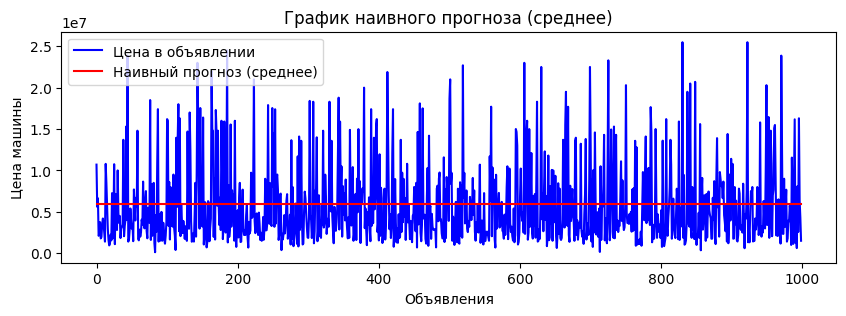

In [167]:
plt.figure(figsize=(10, 3))
plt.plot(actual, label='Цена в объявлении', color='blue')
plt.plot(predicted, label='Наивный прогноз (среднее)', color='red')
plt.xlabel('Объявления')
plt.ylabel('Цена машины')
plt.title('График наивного прогноза (среднее)')
plt.legend()
plt.show()

Среднеквадратическая ошибка (RMSE) равна 5009690.40, что говорит об огромном отклонении между прогнозом (средним) и реальным значением. Следовательно, обученная таким образом модель будет абсолютно неэффективной.

### Обучение линейной регрессии

In [168]:
y = df1[["Цена машины, ₽"]]
y_train = df_train['Цена машины, ₽']
y_test = df_test['Цена машины, ₽']

X = df1.drop(columns=["Цена машины, ₽","Ссылка"])
features = X.columns.values

X_train = df_train[features]
X_test = df_test[features]


In [169]:
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

y_test_hat = model_regression.predict(X_test)
y_train_hat = model_regression.predict(X_train)

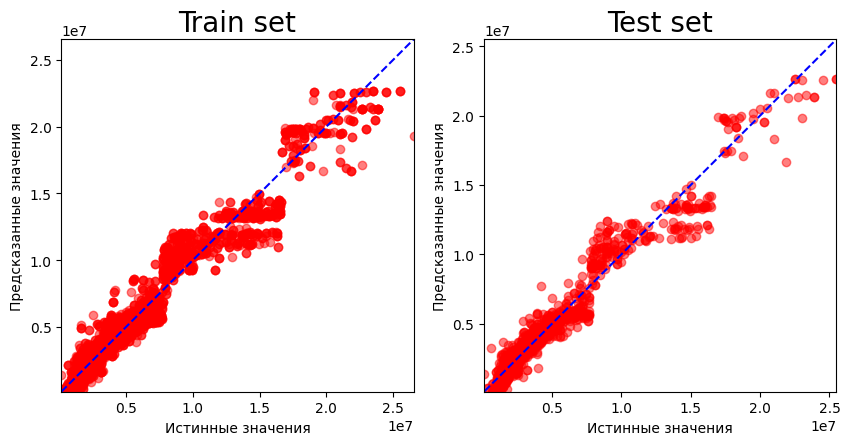

In [170]:
plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat)

In [171]:
mse = np.mean(( y_train - y_train_hat)**2)
rmse = np.sqrt(mse)
rmse 

1107513.4057308682

RMSE более чем в 5 раз меньше относительно модели наивного прогноза. Ошибка в среднем на одно наблюдение равна 1 107 513,41 ₽, что явлеяется довольно точным резульатом для модели.

## Обучение Lasso - регрессии

Найдём опримальный параметр альфа для модели:

In [173]:
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train[features])
X_test_scaled = scaler_x.transform(X_test[features])

Best alpha = 4.2813


Text(0, 0.5, 'CV score')

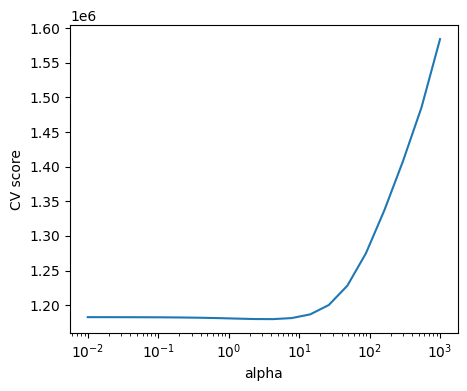

In [174]:
np.logspace(-2, 3, 20)

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(
    Ridge(), [{"alpha": alphas}], 
    scoring="neg_root_mean_squared_error", cv=10
)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.figure(figsize=(5,4))
plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [180]:
model = Lasso(alpha=best_alpha, max_iter=10000)#увеличение количества итераций для увеличения точности модели
 
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
y_train_hat = model.predict(X_train)


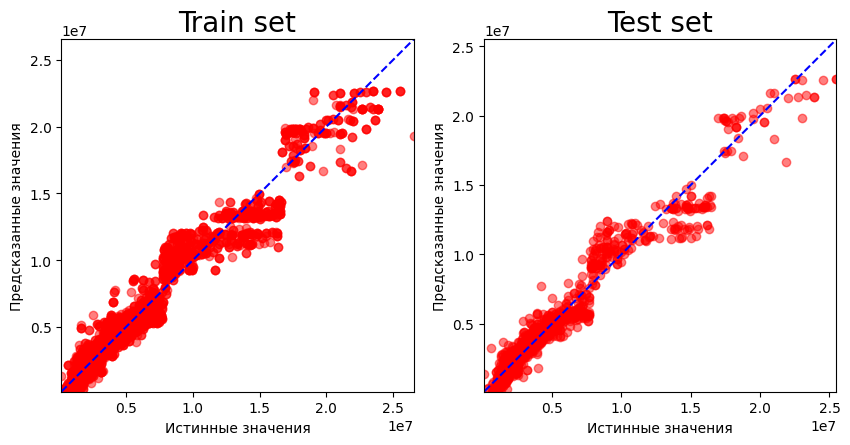

In [181]:
plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat)

In [182]:
mse = np.mean(( y_train - y_train_hat)**2)
rmse = np.sqrt(mse)
rmse #точность на уровне модели линейной регрессии

1107530.5016496077

Модель наивного прогноза показа свою неэффективность по сравнению с моделью линейной регресии и с моделью lasso-регрессии, они в свою очередь показади хорошие результаты, вероятно, потому что обучались на большом количестве данных с больших количеством числовых и категориальных признаков. Обе модели дали среднюю ошибку (RMSE) в районе 1 107 500,00 ₽, 

In [192]:
lasso_coefs = pd.DataFrame(
    data=model.coef_, index=features, columns=['Coef']
)

lasso_coefs

Coef
Срок размещения объявления (дней) -1.694230e+04
Год выпуска                        2.685495e+05
Пробег, км                        -4.529730e+00
Модель машины_BMW 1 серия 1.5 AT  -7.160276e+05
Модель машины_BMW 1 серия 1.6 AT   3.761984e+05
...                                         ...
Износ_Экстремальный               -8.879733e+05
Класс_Премиум                     -5.373318e+06
Класс_Средний                     -8.706243e+06
Класс_Эконом                      -8.840509e+06
ДТП_True                          -5.616313e+05

[126 rows x 1 columns]

Из таблицы коэффициентов можно сделать следующие выводы:

* Срок размещения объявления (дней) имеет отрицательный коэффициент, что может указывать на то, что более длительный срок размещения объявления может снижать стоимость автомобиля.

* Год выпуска имеет положительный коэффициент, что говорит о том, что автомобили более поздних годов выпуска могут стоить дороже.

* Пробег, км имеет отрицательный коэффициент. Это может означать, что автомобили с меньшим пробегом могут быть более привлекательными для покупателей и, следовательно, иметь более высокую стоимость.

* Модели машин в целом имеют разные коэффициенты, скорее всего, это зависит от популярности той или иной модели в выборке, соответственно, и её влияния не цены.

* Износ автомобиля также влияет на его стоимость: чем больше износ, тем меньше стоимость.

* Класс автомобиля (премиум, средний или эконом) также оказывает значительное влияние на его стоимость. Автомобили премиум-класса обычно стоят дороже, а автомобили эконом-класса — дешевле.

* Наличие ДТП в истории автомобиля снижает его стоимость.
